In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NX = 1000



In [485]:
def _diffusion_matrix(cfld, PHI, NX, Nsteps):
    T = np.zeros([NX,NX])
    T[0][0] = 1
    T[-1][-1] = 1
    
    a = cfld
    b = cfld
    c = 1-2*cfld

    for n in range(1,NX-1):
        T[n][n-1]=a
        T[n][n]=c
        T[n][n+1]=b
        
    f = np.zeros([Nsteps, NX])

    sizex = 1
    dx = 1. /NX
#     print(dx)
    x = np.linspace(0,1,NX)

    sigma = .1*sizex
#     print(x[1:-1])
    f[0][1:-1] = np.exp(-.5*np.power((x[1:-1]-sizex/2)/sigma,2))
#     print(np.exp(-.5*np.power((x[1:-1]-sizex/2)/sigma,2)))
    f[0,0] = PHI
    f[0,-1] = PHI
    
    return T,f
def _AD_matrix(cfld, cfla, PHI, NX, Nsteps):
    T = np.zeros([NX,NX])
    T[0][0] = 1
    T[-1][-1] = 1
    
    a = cfld + cfla/2
    b = cfld - cfla/2
    c = 1-2*cfld

    for n in range(1,NX-1):
        T[n][n-1]=a
        T[n][n]=c
        T[n][n+1]=b
        
    f = np.zeros([Nsteps, NX])

    sizex = 1
    dx = 1. /NX
#     print(dx)
    x = np.linspace(0,1,NX)

    sigma = .1*sizex
#     print(x[1:-1])
    f[0][1:-1] = np.exp(-.5*np.power((x[1:-1]-sizex/2)/sigma,2))
#     print(np.exp(-.5*np.power((x[1:-1]-sizex/2)/sigma,2)))
    f[0,0] = PHI
    f[0,-1] = PHI
    
    return T,f
def diffusion_with_history(cfld, PHI, NX, Nsteps):
    T,f = _diffusion_matrix(cfld, PHI, NX, Nsteps)
    dx    = 1/float(NX-1)
    x = np.linspace(0,1,NX)

    for t in range(1,Nsteps):
        f[t] = np.dot(T,f[t-1])
    return x, f

def diffusion_fast(cfld, PHI, NX, Nsteps):
    T,f = _diffusion_matrix(cfld, PHI, NX, Nsteps)
    x = np.linspace(0,1,NX)*dx


    return x,np.dot(np.linalg.matrix_power(T,Nsteps),f[0])
def AD_with_history(cfld, cfla, PHI, NX, Nsteps):
    T,f = _AD_matrix(cfld, cfla, PHI, NX, Nsteps)
    dx    = 1/float(NX-1)
    x = np.linspace(0,1,NX)

    for t in range(1,Nsteps):
        f[t] = np.dot(T,f[t-1])
    return x, f

%time diffusion_fast(.4,1,100,34000)
x,f = diffusion_with_history(.2, 10, 100, 50000)


CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 6.05 ms


In [486]:
def calc_H(f,dx):
    tot = 0
    for i in f.flatten():
        tot += i*i*dx
    return tot
def calc_M0(f):
    tot =0
    for i in f.flatten():
        tot += i
    return tot
def calc_M1(f,x):
    return np.dot(f,x)

def norm(x):
    np.array(x)
    x/=np.max(x)
    return x
def diag(x,f):
    dx = x[1]-x[0]
    list_H = []
    list_M0 = []
    list_M1 = []
    for i in range(len(f)-1):
        list_H.append(calc_H(f[i],dx))
        list_M0.append(calc_M0(f[i]))
        list_M1.append(calc_M1(f[i],x))
    plt.figure(figsize =(9,9))
    plt.plot(list(range(len(f)-1)),norm(list_H),'k',lw=5 , label = r"$H_2$")
    plt.plot(list(range(len(f)-1)),norm(list_M0),':',lw=5 , label = r"$M_0$")
#     plt.plot(list(range(len(f)-1)),norm(list_M1),'--',lw=5 , label = r"$M_1$")
#     print(np.array(list_M1)-np.array(list_M0))
    print(norm(list_M1))
    fs = 20
    plt.ylabel("Normalized Value",fontsize =fs)
    plt.legend(fontsize = fs)

    plt.xlabel("Time step",fontsize = fs)
    plt.show()


[ 0.27216177  0.27536182  0.27808185 ...,  0.99999999  1.          1.        ]


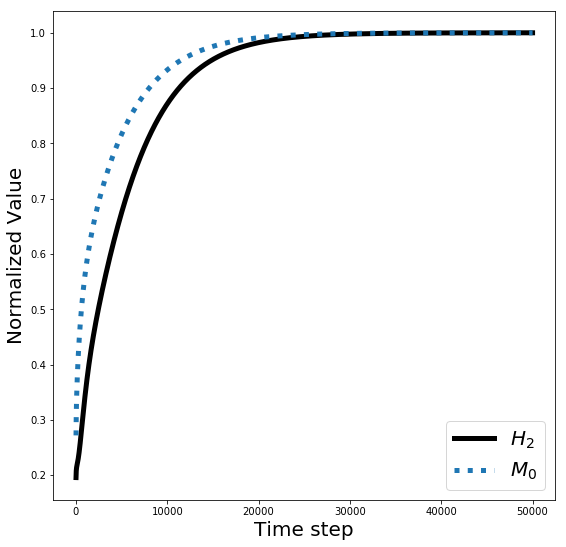

In [492]:
x,f = diffusion_with_history(.2, 1, 100, 50000)
diag(x,f[1:-1])


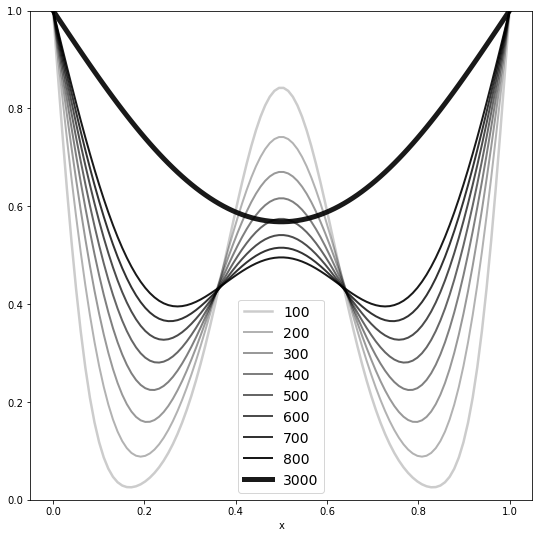

In [493]:

lw = 2
plt.figure(figsize = (9,9))
# plt.plot(x,f[0],'k--',alpha = 1, lw = lw+.5,label = 0)

plt.plot(x,f[100],'k',alpha = .2, lw = lw+.5,label = 100)
plt.plot(x,f[200],'k',alpha = .3, lw = lw,label = 200)
plt.plot(x,f[300],'k',alpha = .4, lw = lw,label = 300)
plt.plot(x,f[400],'k',alpha = .5, lw = lw,label = 400)
plt.plot(x,f[500],'k',alpha = .6, lw = lw,label = 500)
plt.plot(x,f[600],'k',alpha = .7, lw = lw,label = 600)
plt.plot(x,f[700],'k',alpha = .8, lw = lw,label = 700)
plt.plot(x,f[800],'k',alpha = .9, lw = lw,label = 800)
plt.plot(x,f[3000],'k',alpha = .9, lw = lw+3,label = 3000)

plt.ylim([0,1])
plt.xlabel('x')
plt.legend(fontsize = 14)
plt.show()


In [478]:
print(f[0][1:-1].shape)
print(x[1:-1].shape)

np.dot(f[2][1:-1],x[1:-1])


(98,)
(98,)


16.00779845930181

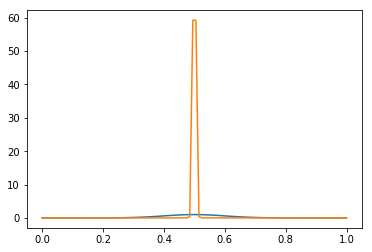

In [315]:
x,f = diffusion_with_history(.4, 0, 100, 5000)
plt.plot(x,f[0])
dx = x[1]-x[0]


D = 1
tstep = .4 * dx*dx
t = 1*tstep
an = np.exp(-((x-.5)**2)/(t))/np.sqrt(2*t)

plt.plot(x,an)

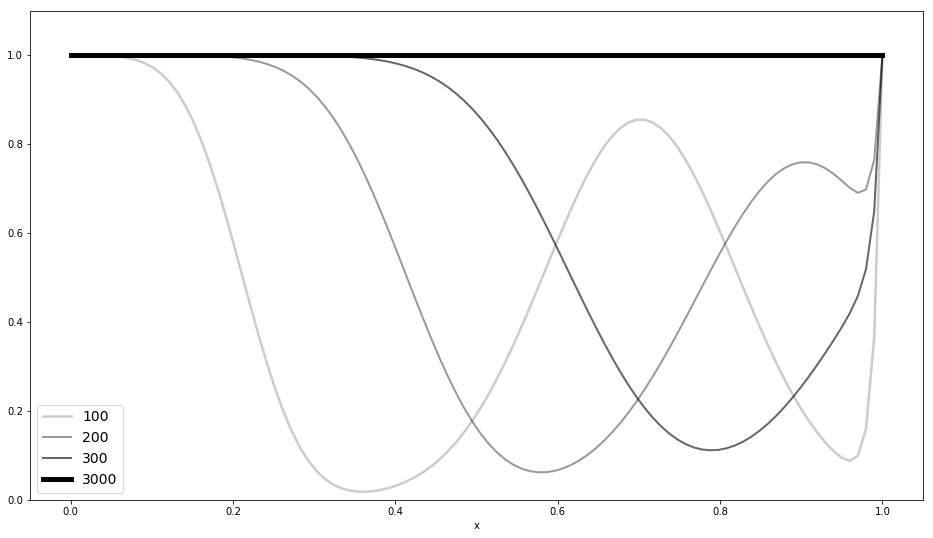

In [501]:
x,f = AD_with_history(.2,.2, 1, 100, 5000)
lw = 2
plt.figure(figsize = (16,9))
# plt.plot(x,f[0],'k--',alpha = 1, lw = lw+.5,label = 0)

plt.plot(x,f[100],'k',alpha = .2, lw = lw+.5,label = 100)
plt.plot(x,f[200],'k',alpha = .4, lw = lw,label = 200)
plt.plot(x,f[300],'k',alpha = .6, lw = lw,label = 300)
plt.plot(x,f[3000],'k',alpha = 1, lw = lw+3,label = 3000)

plt.ylim([0,1.1])
plt.xlabel('x')
plt.legend(fontsize = 14)
plt.show()


In [337]:
x,f = AD_with_history(.2,.5, 0, 100, 5000)


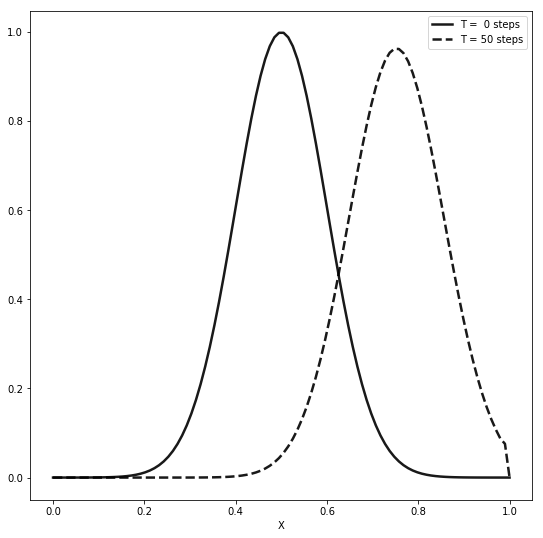

In [346]:
plt.figure(figsize=(9,9))
plt.plot(x,f[0],'k',alpha = .9, lw = lw+.5,label = "T =  0 steps")
plt.plot(x,f[50],'k--',alpha = .9, lw = lw+.5,label = "T = 50 steps")
plt.legend()
plt.xlabel('X')
plt.show()

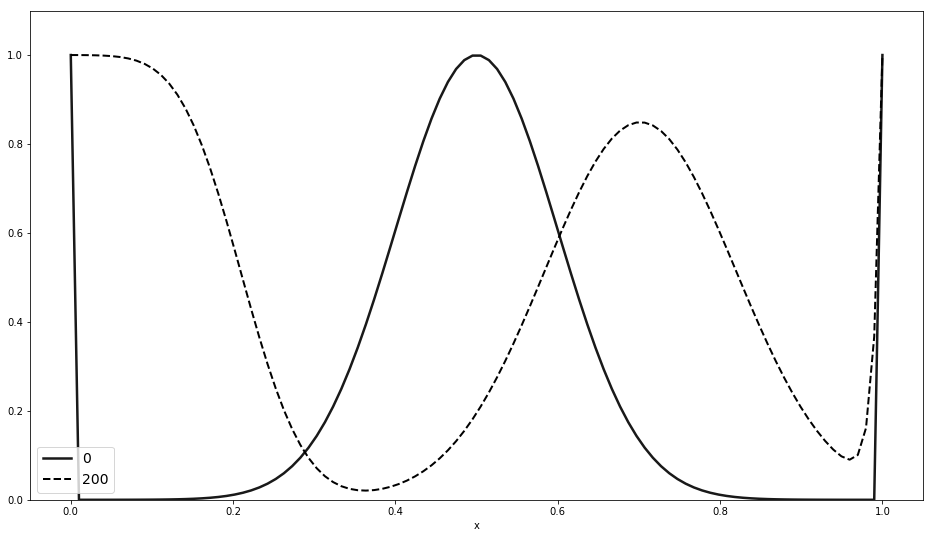

In [293]:
lw = 2
plt.figure(figsize = (16,9))
# plt.plot(x,f[0],'k--',alpha = 1, lw = lw+.5,label = 0)

plt.plot(x,f[0],'k',alpha = .9, lw = lw+.5,label = 0)
plt.plot(x,f[200],'k--',alpha = 1, lw = lw,label = 200)

plt.ylim([0,1.1])
plt.xlabel('x')
plt.legend(fontsize = 14)
plt.show()

In [208]:
%%time
T,f = _diffusion_matrix(.5, 50, 1000, 3000)
dx    = 1/float(NX-1)
x = np.linspace(1,NX,NX)*dx



for i in range(Nsteps-1):
    T = np.dot(T, 2)
np.dot(T,f[0])

KeyboardInterrupt: 

In [115]:
%%time
Nsteps = 3000
T,f = _diffusion_matrix(.4, 50, 100, 300)
print(T)
for i in range(Nsteps-1):
    T = np.dot(T, 2)
print(T)

[[ 1.   0.   0.  ...,  0.   0.   0. ]
 [ 0.4  0.2  0.4 ...,  0.   0.   0. ]
 [ 0.   0.4  0.2 ...,  0.   0.   0. ]
 ..., 
 [ 0.   0.   0.  ...,  0.2  0.4  0. ]
 [ 0.   0.   0.  ...,  0.4  0.2  0.4]
 [ 0.   0.   0.  ...,  0.   0.   1. ]]
[[ inf   0.   0. ...,   0.   0.   0.]
 [ inf  inf  inf ...,   0.   0.   0.]
 [  0.  inf  inf ...,   0.   0.   0.]
 ..., 
 [  0.   0.   0. ...,  inf  inf   0.]
 [  0.   0.   0. ...,  inf  inf  inf]
 [  0.   0.   0. ...,   0.   0.  inf]]
CPU times: user 44 ms, sys: 0 ns, total: 44 ms
Wall time: 44.4 ms


In [142]:
%%time
cfld =.4
NX = 100
T = np.zeros([NX,NX])
a = cfld
b=cfld
c=1-2*cfld
    
T[0][0] = 1
T[-1][-1] = 1
for n in range(1,NX-1):
    T[n][n-1]=a
    T[n][n]=c
    T[n][n+1]=b
print(T)



[[ 1.   0.   0.  ...,  0.   0.   0. ]
 [ 0.4  0.2  0.4 ...,  0.   0.   0. ]
 [ 0.   0.4  0.2 ...,  0.   0.   0. ]
 ..., 
 [ 0.   0.   0.  ...,  0.2  0.4  0. ]
 [ 0.   0.   0.  ...,  0.4  0.2  0.4]
 [ 0.   0.   0.  ...,  0.   0.   1. ]]
[[ 1.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.73170903  0.02850703  0.04836762 ...,  0.          0.          0.        ]
 [ 0.49192509  0.04836762  0.08441129 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.08441129  0.04836762
   0.49192509]
 [ 0.          0.          0.         ...,  0.04836762  0.02850703
   0.73170903]
 [ 0.          0.          0.         ...,  0.          0.          1.        ]]
CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 9.82 ms


In [197]:
cfld =.4
NX = 20
T = np.zeros([NX,NX])
a = cfld
b=cfld
c=1-2*cfld
    
T[0][0] = 1
T[-1][-1] = 1
for n in range(1,NX-1):
    T[n][n-1]=a
    T[n][n]=c
    T[n][n+1]=b
# print(T)
%time T = np.linalg.matrix_power(T,1000)


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 148 µs


ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

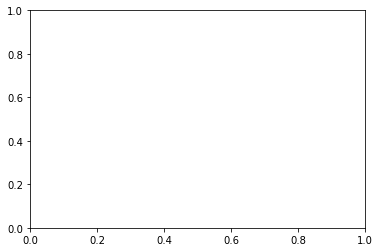

In [192]:
NXs = [5,10,20,40,80]
times= [.3, .16, .387, .579]
plt.plot(NXs, times)

In [125]:
(100**3-100**2)*5000/(5*10**(-3))*10**(-9)

990.0000000000001

In [121]:
%%time
cfld =.4
NX = 100
T = np.zeros([NX,NX])
a = cfld
b=cfld
c=1-2*cfld
    
T[0][0] = 1
T[-1][-1] = 1
for n in range(1,NX-1):
    T[n][n-1]=a
    T[n][n]=c
    T[n][n+1]=b
print(T)

for i in range(Nsteps-1):
    T = np.dot(T,T)
print(T)

[[ 1.   0.   0.  ...,  0.   0.   0. ]
 [ 0.4  0.2  0.4 ...,  0.   0.   0. ]
 [ 0.   0.4  0.2 ...,  0.   0.   0. ]
 ..., 
 [ 0.   0.   0.  ...,  0.2  0.4  0. ]
 [ 0.   0.   0.  ...,  0.4  0.2  0.4]
 [ 0.   0.   0.  ...,  0.   0.   1. ]]
[[ 1.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.98989899  0.          0.         ...,  0.          0.          0.01010101]
 [ 0.97979798  0.          0.         ...,  0.          0.          0.02020202]
 ..., 
 [ 0.02020202  0.          0.         ...,  0.          0.          0.97979798]
 [ 0.01010101  0.          0.         ...,  0.          0.          0.98989899]
 [ 0.          0.          0.         ...,  0.          0.          1.        ]]
CPU times: user 296 ms, sys: 0 ns, total: 296 ms
Wall time: 157 ms


In [138]:
2*100**3*5000 / (2.8 * 10**9)

3.5714285714285716

In [132]:
%%time


for i in range(5000):
    a = np.random.rand(100,100)
    b = np.random.rand(100,100)
    np.dot(a,b)
    

CPU times: user 2.86 s, sys: 8 ms, total: 2.87 s
Wall time: 1.46 s


In [103]:
# T,f = _diffusion_matrix(.4, 50, 1000, 3000)

print(T)

[[ inf   0.   0. ...,   0.   0.   0.]
 [ inf  inf  inf ...,   0.   0.   0.]
 [  0.  inf  inf ...,   0.   0.   0.]
 ..., 
 [  0.   0.   0. ...,  inf  inf   0.]
 [  0.   0.   0. ...,  inf  inf  inf]
 [  0.   0.   0. ...,   0.   0.  inf]]


In [137]:
2*100**2/24*5000/(5*10**-3)*10**-9

0.8333333333333334

In [117]:
%%time
print(Nsteps)
T_np,f = _diffusion_matrix(.4, 50, 100, 3000)
print(T_np)
T_np = np.linalg.matrix_power(T,Nsteps)
print(T_np)

3000
[[ 1.   0.   0.  ...,  0.   0.   0. ]
 [ 0.4  0.2  0.4 ...,  0.   0.   0. ]
 [ 0.   0.4  0.2 ...,  0.   0.   0. ]
 ..., 
 [ 0.   0.   0.  ...,  0.2  0.4  0. ]
 [ 0.   0.   0.  ...,  0.4  0.2  0.4]
 [ 0.   0.   0.  ...,  0.   0.   1. ]]
[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]
CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 11.9 ms


In [116]:
Nsteps = 3000
T,f = _diffusion_matrix(.4, 50, 100, 300)
print(T)
for i in range(Nsteps-1):
    T = np.dot(T, 2)
print(T)

[[ 1.   0.   0.  ...,  0.   0.   0. ]
 [ 0.4  0.2  0.4 ...,  0.   0.   0. ]
 [ 0.   0.4  0.2 ...,  0.   0.   0. ]
 ..., 
 [ 0.   0.   0.  ...,  0.2  0.4  0. ]
 [ 0.   0.   0.  ...,  0.4  0.2  0.4]
 [ 0.   0.   0.  ...,  0.   0.   1. ]]
[[ inf   0.   0. ...,   0.   0.   0.]
 [ inf  inf  inf ...,   0.   0.   0.]
 [  0.  inf  inf ...,   0.   0.   0.]
 ..., 
 [  0.   0.   0. ...,  inf  inf   0.]
 [  0.   0.   0. ...,  inf  inf  inf]
 [  0.   0.   0. ...,   0.   0.  inf]]


In [89]:
T_np - T

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [64]:
%%time
x,f = diffusion_fast(.5, 50, NX = 1000, Nsteps = 3000)


CPU times: user 1.14 s, sys: 4 ms, total: 1.14 s
Wall time: 577 ms


# 2 D

In [357]:
Nsteps = 30
NX = 25
PHI = 50
T_2D = np.zeros([NX,NX,NX])
T_2D[:,0,0] = 1
T_2D[:,-1,-1] = 1
f_2D = np.zeros([Nsteps, NX,NX])

f_2D[0,0,:]  = PHI
f_2D[0,-1,:] = PHI
f_2D[0,:,0]  = PHI
f_2D[0,:,-1] = PHI
cfld = .4        
a = cfld
b = cfld
c = 1-4*cfld

a = 1
c = 2
b =3
for n in range(1,NX-1):
    for j in range(1,NX-1):
        T_2D[n][j][j]=c
        T_2D[n][j][j+1] = b
        T_2D[n][j][j-1] = a

print(T_2D[2])


[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 1.  2.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  2.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  2.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  2.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  2.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  2.  3.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  3.  0.  0.  

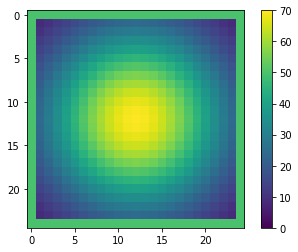

In [353]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


Nsteps = 400
NX = 25
sizex  = 1.0 
dif    = 1.0 


dx    = sizex/float(NX-1)


x = np.linspace(0,1,NX)
f = np.zeros([Nsteps,NX,NX])
PHI = 50
D = 1
# h 
cfld = .2


#Parameters to set
mu_x = np.mean(x)
variance_x = .1

mu_y = np.mean(x)
variance_y = .1


X, Y = np.meshgrid(x,x)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

f[0]+=rv.pdf(pos)/np.max(rv.pdf(pos))*70
f[0,0,:]  = PHI
f[0,-1,:] = PHI
f[0,:,0]  = PHI
f[0,:,-1] = PHI

# im=plt.imshow(data[None], aspect='auto',cmap=cmap, norm=norm)
# cbar = plt.colorbar(im)
# cbar
plt.imshow(f[0],vmin=0,vmax=70)
plt.colorbar()
plt.show()


(1, 25, 25)
(25, 25, 25)


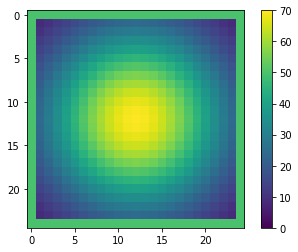

TypeError: Invalid dimensions for image data

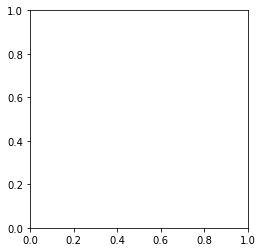

In [372]:
a = np.dot(T_2D,f[0])
print(f[0].reshape(1,25,25).shape)
print(a.shape)
plt.imshow(f[0],vmin=0,vmax=70)
plt.colorbar()
plt.show()
plt.imshow(a,vmin=0,vmax=70)
plt.colorbar()
plt.show()


(25, 25, 1)
(25, 25)
(25, 25, 1)


TypeError: Invalid dimensions for image data

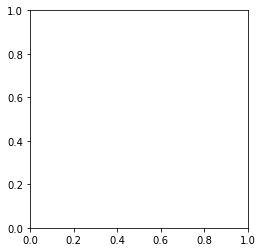

In [394]:
f[0].reshape(25,25,1)
print(f[0].reshape(25,25,1).shape)
a = T_2D@f[0].reshape(25,25,1)
print(f[0].shape)
print(a.shape)
plt.imshow(a.flatten())

In [355]:
%%time
a=np.dot(T_2D,T_2D)

CPU times: user 19.3 s, sys: 300 ms, total: 19.6 s
Wall time: 19.6 s
